## Load the dataset

In [1]:
from datasets import load_dataset, load_metric

buglab_dataset = load_dataset("json", data_files="/mnt/data/andre/mscthesis/perturbations_buglab/generated_defects4j_buglab/*.json", field="bugs")
print(buglab_dataset)

selfapr_dataset = load_dataset("json", data_files="/mnt/data/andre/mscthesis/perturbations_selfapr/generated_defects4j_selfapr/*.json", field="bugs")
print(selfapr_dataset)

Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Using custom data configuration default-7d721f3b83caa41e
Reusing dataset json (/home/andre/.cache/huggingface/datasets/json/default-7d721f3b83caa41e/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['identifier', 'path', 'diff', 'context', 'perturb_rule'],
        num_rows: 424599
    })
})


Resolving data files:   0%|          | 0/17 [00:00<?, ?it/s]

Using custom data configuration default-70dff1aa2bbb9a72
Reusing dataset json (/home/andre/.cache/huggingface/datasets/json/default-70dff1aa2bbb9a72/0.0.0/ac0ca5f5289a6cf108e706efcf040422dbbfa8e658dee6a819f20d76bb84d26b)


  0%|          | 0/1 [00:00<?, ?it/s]

DatasetDict({
    train: Dataset({
        features: ['identifier', 'path', 'diff', 'context', 'perturb_rule'],
        num_rows: 1607022
    })
})


## Perturbation Rules Analysis

In [2]:
buglab_rule_frequency = {}
for example in buglab_dataset["train"]:
    if example["perturb_rule"] in buglab_rule_frequency:
        buglab_rule_frequency[example["perturb_rule"]] += 1
    else:
        buglab_rule_frequency[example["perturb_rule"]] = 1

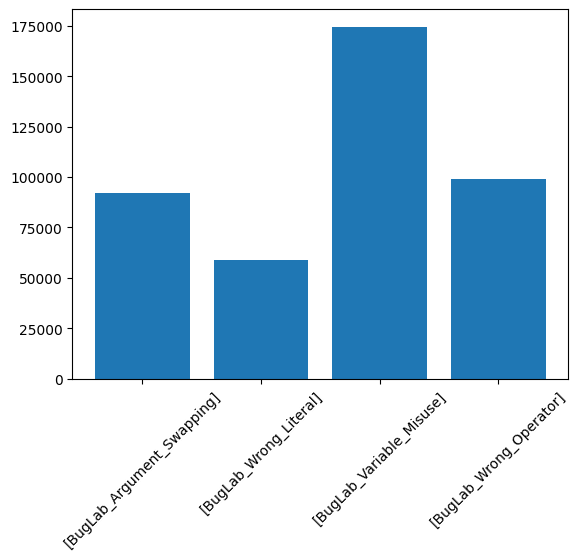

In [3]:
import matplotlib.pyplot as plt

plt.bar(buglab_rule_frequency.keys(), buglab_rule_frequency.values())
plt.xticks(rotation = 45)
plt.show()

In [4]:
selfapr_rule_frequency = {}
for example in selfapr_dataset["train"]:
    if example["perturb_rule"] in selfapr_rule_frequency:
        selfapr_rule_frequency[example["perturb_rule"]] += 1
    else:
        selfapr_rule_frequency[example["perturb_rule"]] = 1

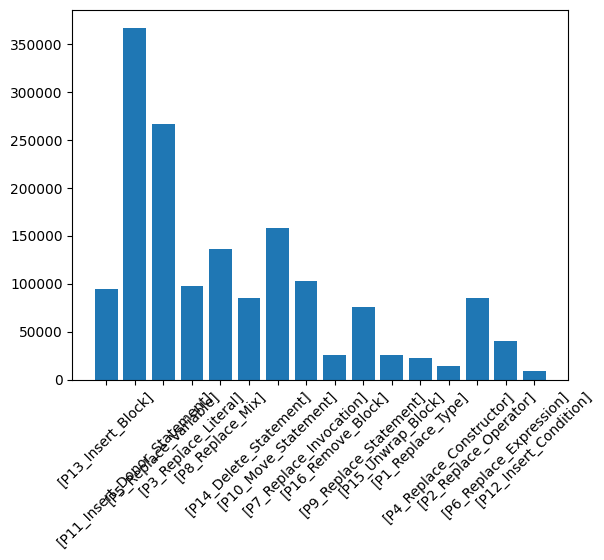

In [5]:
import matplotlib.pyplot as plt

plt.bar(selfapr_rule_frequency.keys(), selfapr_rule_frequency.values())
plt.xticks(rotation = 45)
plt.show()

## Tokenization Analysis

In [6]:
from unidiff import PatchSet
from src.model_utils import source_str, target_str

In [7]:
from transformers import AutoTokenizer, PLBartTokenizer

tokenizer = PLBartTokenizer.from_pretrained("experiments/defects4j_buglab/round0/fixer")
tokenizer

PreTrainedTokenizer(name_or_path='experiments/defects4j_buglab/round0/fixer', vocab_size=50005, model_max_len=1024, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True), 'additional_special_tokens': ['java', 'python', 'en_XX']})

In [11]:
source_frequency = {}
target_frequency = {}
for i, example in enumerate(buglab_dataset["train"]):
    if i < 1:
        print(source_str(example["diff"]))
    l = len(tokenizer(source_str(example["diff"])).input_ids)
    if l in source_frequency:
        source_frequency[l] += 1
    else:
        source_frequency[l] = 1        
    l = len(tokenizer(target_str(example["diff"])).input_ids)
    if l in target_frequency:
        target_frequency[l] += 1
    else:
        target_frequency[l] = 1

- GAP_RADIUS - stringWidth, midY); break; case BULB: temp = this.valueFormat.format(current); i = metrics.stringWidth(temp) / 2; [START_BUGGY] g2.drawString ( temp, midX - i, stemBottom + GAP_RADIUS + BULB_RADIUS ) ; [END_BUGGY] break; default: } /***/ }


338


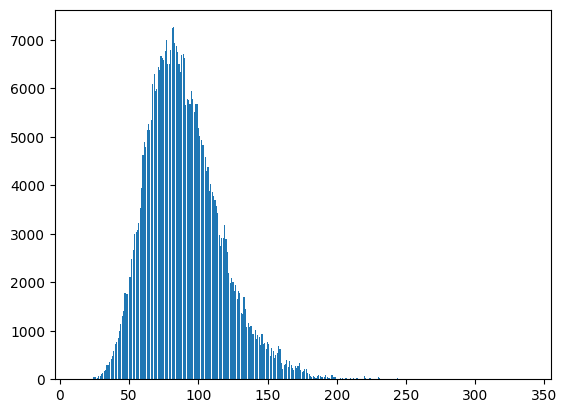

107


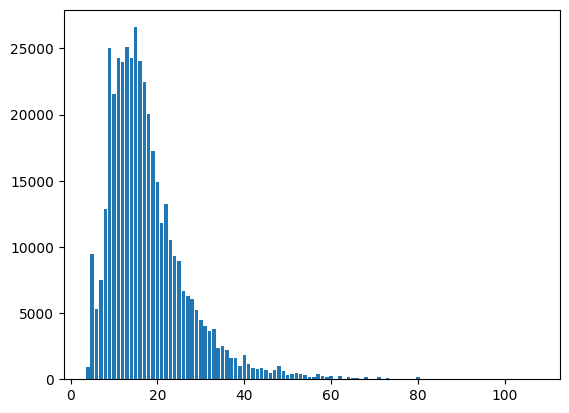

In [12]:
import matplotlib.pyplot as plt

print(max(source_frequency.keys()))
plt.bar(source_frequency.keys(), source_frequency.values())
plt.show()

print(max(target_frequency.keys()))
plt.bar(target_frequency.keys(), target_frequency.values())
plt.show()

In [14]:
source_frequency = {}
target_frequency = {}
for i, example in enumerate(selfapr_dataset["train"]):
    if i < 1:
        print(source_str(example["diff"]))
    l = len(tokenizer(source_str(example["diff"])).input_ids)
    if l in source_frequency:
        source_frequency[l] += 1
    else:
        source_frequency[l] = 1        
    l = len(tokenizer(target_str(example["diff"])).input_ids)
    if l in target_frequency:
        target_frequency[l] += 1
    else:
        target_frequency[l] = 1

* @param flag the flag. * * @see #isVisible() */ public void setVisible(boolean flag) { [START_BUGGY] if ( ! ( insets.equals ( this.labelInsets ) ) ) { this.labelInsets = insets; notifyListeners ( new AxisChangeEvent ( this ) ) ; } [END_BUGGY] this.visible = flag; notifyListeners(new AxisChangeEvent(this)); } }


823


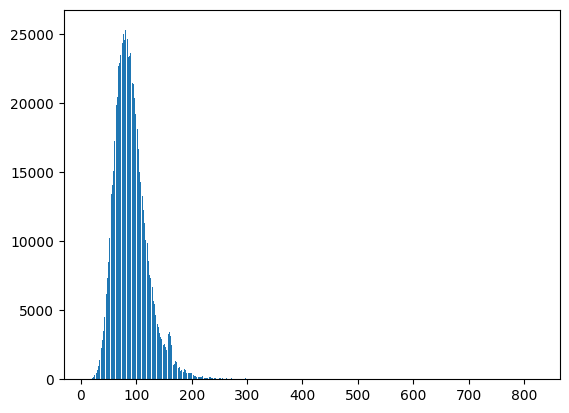

108


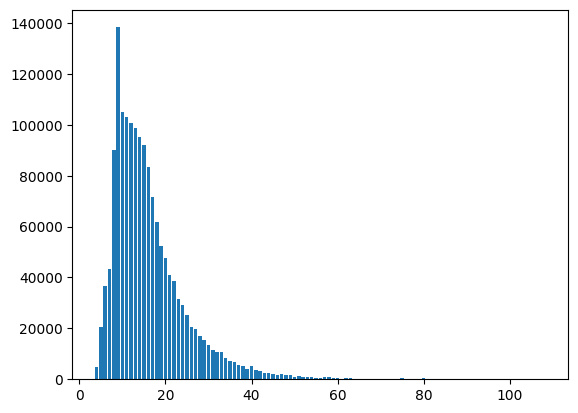

In [15]:
print(max(source_frequency.keys()))
plt.bar(source_frequency.keys(), source_frequency.values())
plt.show()

print(max(target_frequency.keys()))
plt.bar(target_frequency.keys(), target_frequency.values())
plt.show()